In [1]:
from sentence_transformers import CrossEncoder

model = CrossEncoder('cross-encoder/ms-marco-MiniLM-L6-v2')
scores = model.predict([
    ("How many people live in Berlin?", "Berlin had a population of 3,520,031 registered inhabitants in an area of 891.82 square kilometers."),
    ("How many people live in Berlin?", "Berlin is well known for its museums."),
])
print(scores)
# [ 8.607138 -4.320078]

c:\Users\mokrota\Documents\GitHub\math_problem_recommender\math_problem_recommender\.venv\Lib\site-packages\sentence_transformers\cross_encoder\CrossEncoder.py:13: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from tqdm.autonotebook import tqdm, trange


[ 8.607139 -4.320077]


In [2]:
"""
This is a more complex example on performing clustering on large scale dataset.

This examples find in a large set of sentences local communities, i.e., groups of sentences that are highly
similar. You can freely configure the threshold what is considered as similar. A high threshold will
only find extremely similar sentences, a lower threshold will find more sentence that are less similar.

A second parameter is 'min_community_size': Only communities with at least a certain number of sentences will be returned.

The method for finding the communities is extremely fast, for clustering 50k sentences it requires only 5 seconds (plus embedding computation).

In this example, we download a large set of questions from Quora and then find similar questions in this set.
"""

import csv
import os
import time

from sentence_transformers import SentenceTransformer, util

# Model for computing sentence embeddings. We use one trained for similar questions detection
model = SentenceTransformer("all-MiniLM-L6-v2")

# We download the Quora Duplicate Questions Dataset (https://www.quora.com/q/quoradata/First-Quora-Dataset-Release-Question-Pairs)
# and find similar question in it
url = "http://qim.fs.quoracdn.net/quora_duplicate_questions.tsv"
dataset_path = "quora_duplicate_questions.tsv"
max_corpus_size = 50000  # We limit our corpus to only the first 50k questions


# Check if the dataset exists. If not, download and extract
# Download dataset if needed
if not os.path.exists(dataset_path):
    print("Download dataset")
    util.http_get(url, dataset_path)

# Get all unique sentences from the file
corpus_sentences = set()
with open(dataset_path, encoding="utf8") as fIn:
    reader = csv.DictReader(fIn, delimiter="\t", quoting=csv.QUOTE_MINIMAL)
    for row in reader:
        corpus_sentences.add(row["question1"])
        corpus_sentences.add(row["question2"])
        if len(corpus_sentences) >= max_corpus_size:
            break

corpus_sentences = list(corpus_sentences)
print("Encode the corpus. This might take a while")
def cluster(corpus_sentences, model, min_community_size=25, threshold=0.75):
    corpus_embeddings = model.encode(corpus_sentences, batch_size=64, show_progress_bar=True, convert_to_tensor=True)

    print("Start clustering")
    start_time = time.time()

    # Two parameters to tune:
    # min_cluster_size: Only consider cluster that have at least 25 elements
    # threshold: Consider sentence pairs with a cosine-similarity larger than threshold as similar
    clusters = util.community_detection(corpus_embeddings, min_community_size=min_community_size, threshold=threshold)

    print(f"Clustering done after {time.time() - start_time:.2f} sec")
    return clusters

Encode the corpus. This might take a while


In [3]:
import pandas as pd
import os

benchmark = pd.read_csv(os.path.abspath("benchmark\\andreescu-andrica-problems-on-number-theory\\benchmark_v1.csv"))

In [4]:
import ast

benchmark["Problem&Solution"] = benchmark["Problem&Solution"].apply(lambda x: ast.literal_eval(x))

In [5]:
clusters_gt = benchmark["Problem&Solution"].tolist()
clusters_gt

[['Problem. Prove that there are infinitely many even positive integers $k$ such that the equation $\\varphi(n)=k$ has no solution.  \n\n(Schinzel4)  \n\nSolution. Take $k=2\\cdot7^{m}$ , $m\\geq1$ . If $n=p_{1}^{\\alpha_{1}}\\ldots{}p_{h}^{\\alpha_{h}}$ , then  \n\n$$\n\\begin{array}{l}{\\varphi(n)=p_{1}^{\\alpha_{1}}\\left(1-\\frac{1}{p_{1}}\\right)\\cdot\\cdot\\cdot p_{h}^{\\alpha_{h}}\\left(1-\\frac{1}{p_{h}}\\right)}\\\\ {=p_{1}^{\\alpha_{1}-1}\\cdot\\cdot\\cdot p_{h}^{\\alpha_{h}-1}(p_{1}-1)\\cdot\\cdot\\cdot(p_{h}-1).}\\end{array}\n$$  \n\nIf at least two of the primes $p_{1},\\ldots,p_{h}$ are odd, then $4|\\varphi(n)$ and $\\varphi(n)\\neq k$ . If $n=2^{\\alpha}p^{\\beta}$ , with $p\\geq3$ , then  \n\n$$\n\\varphi(n)=2^{\\alpha}p^{\\beta}\\left(1-\\frac{1}{2}\\right)\\left(1-\\frac{1}{p}\\right)=2^{\\alpha-1}p^{\\beta-1}(p-1).\n$$  \n\nIn this case the equality $\\varphi(n)=k$ is also impossible.  \n\n',
  'Problem. Prove that there are infinitely many positive integers $n$ su

In [6]:
benchmark = benchmark.explode("Problem&Solution", ignore_index=True)
benchmark

,TopicMetadata,Problem&Solution
0,(Arithmetic Functions)->(Euler’s totient funct...,Problem. Prove that there are infinitely many ...
1,(Arithmetic Functions)->(Euler’s totient funct...,Problem. Prove that there are infinitely many ...
2,(Arithmetic Functions)->(Euler’s totient funct...,Problem. If $n$ is a composite positive intege...
3,(Arithmetic Functions)->(Euler’s totient funct...,"Problem. For any positive integer $n$ , $n\neq..."
4,(Arithmetic Functions)->(Euler’s totient funct...,"Problem. For a positive integer $n$ , let $\ps..."
...,...,...
411,(Some special problems in number theory)->(Spe...,Problem. Let $p$ be a prime of the form $4k+3$...
412,(Some special problems in number theory)->(Spe...,Problem. Let $P^{*}$ denote all the odd primes...
413,(Some special problems in number theory)->(Spe...,Problem. Show that any even perfect number is ...
414,(Some special problems in number theory)->(Spe...,Problem. Prove that if $n$ is an even perfect ...


In [7]:
pd.factorize(benchmark['TopicMetadata'])

(array([ 0,  0,  0,  0,  0,  0,  0,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
         2,  2,  2,  2,  2,  2,  2,  2,  3,  3,  3,  3,  3,  3,  3,  4,  4,
         4,  4,  4,  4,  4,  5,  5,  6,  6,  7,  7,  7,  7,  7,  7,  7,  7,
         7,  7,  7,  8,  8,  8,  8,  8,  9,  9,  9, 10, 10, 10, 11, 11, 11,
        11, 12, 12, 12, 12, 12, 12, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13,
        13, 13, 14, 14, 14, 14, 14, 14, 15, 15, 15, 15, 15, 15, 15, 16, 16,
        16, 16, 16, 16, 17, 17, 17, 17, 17, 17, 17, 17, 18, 18, 18, 18, 18,
        18, 18, 19, 19, 19, 19, 19, 20, 21, 21, 22, 22, 22, 22, 23, 23, 23,
        23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 24,
        24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 25, 25, 25, 25, 25, 25,
        25, 25, 25, 25, 25, 25, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26,
        27, 27, 27, 27, 27, 27, 27, 27, 28, 28, 28, 28, 28, 28, 28, 28, 28,
        28, 28, 28, 28, 28, 28, 28, 28, 29, 29, 29, 29, 29, 29, 29, 29, 29,
        29, 

C:\Users\mokrota\AppData\Local\Temp\ipykernel_6412\2039746254.py:16: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


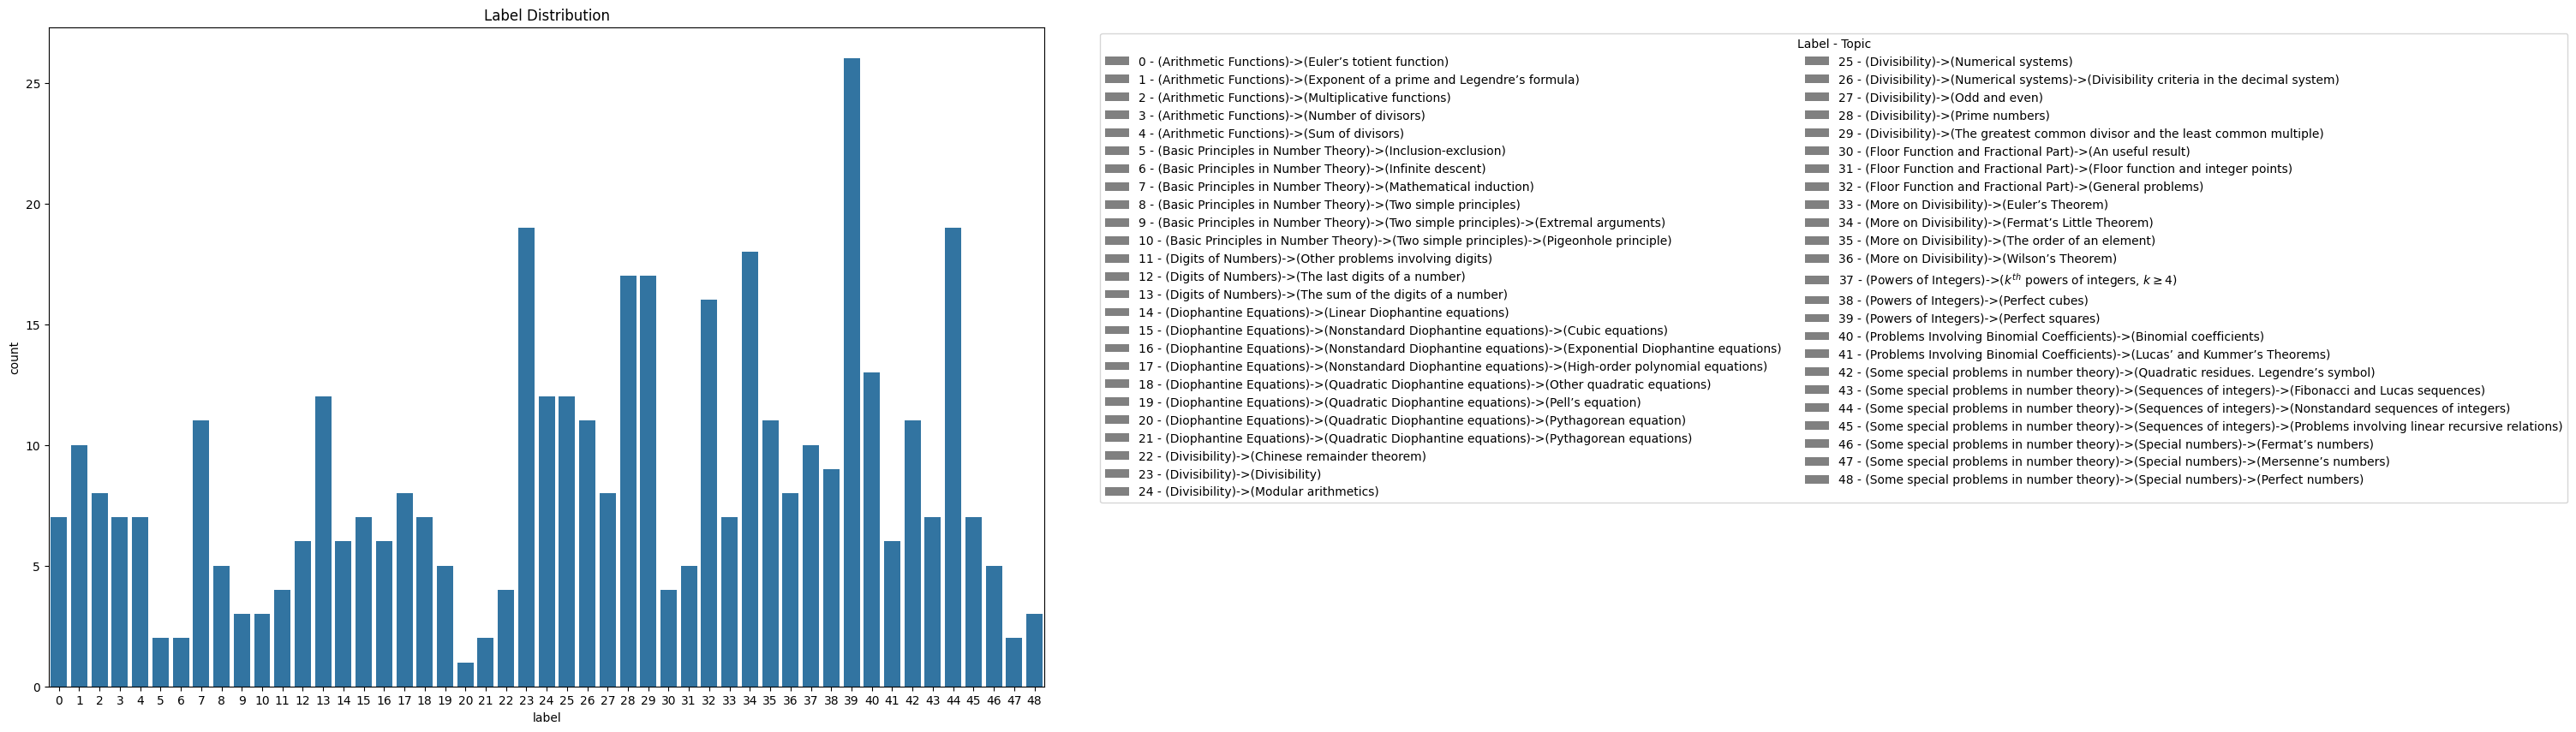

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.patches import Patch

topics = benchmark['TopicMetadata'].unique()
maping = {topics[i]: i for i in range(len(topics))}
reverse_map = {v: k for k, v in maping.items()}
legend_elements = [Patch(facecolor='gray', label=f'{i} - {reverse_map[i]}') for i in sorted(reverse_map)]

benchmark['label'] = benchmark['TopicMetadata'].apply(lambda x: maping[x])

plt.figure(figsize=(15, 10))
sns.countplot(x='label', data=benchmark)
plt.title("Label Distribution")
plt.legend(handles=legend_elements, title='Label - Topic', bbox_to_anchor=(1.05, 1), loc='upper left', ncol=2)
plt.tight_layout()

plt.show()

In [ ]:
count_df = benchmark.groupby("TopicMetadata").size().reset_index(name='count')
topics = count_df[count_df['count'] > 10]["TopicMetadata"].to_list()
benchmark = benchmark[benchmark['TopicMetadata'].isin(topics)].reset_index().drop(["index"], axis=1)

,TopicMetadata,Problem&Solution,label
0,(Basic Principles in Number Theory)->(Mathemat...,"Problem. Prove that, for any integer $n\geq2$ ...",7
1,(Basic Principles in Number Theory)->(Mathemat...,"Problem. Prove that, for each $n\geq2$ , the n...",7
2,(Basic Principles in Number Theory)->(Mathemat...,Problem. Prove that there are infinitely many ...,7
3,(Basic Principles in Number Theory)->(Mathemat...,Problem. Let $n$ be a positive integer. Let $O...,7
4,(Basic Principles in Number Theory)->(Mathemat...,Problem. Prove that for all integers $n\geq3$ ...,7
...,...,...,...
220,(Some special problems in number theory)->(Seq...,Problem. Let $x_{1}=x_{2}=x_{3}=1$ and $x_{n+3...,44
221,(Some special problems in number theory)->(Seq...,Problem. Find all infinite bounded sequences $...,44
222,(Some special problems in number theory)->(Seq...,"Problem. Let $u_{1},u_{2},\ldots,$ . be a sequ...",44
223,(Some special problems in number theory)->(Seq...,Problem. Define the sequence $\{x_{n}\}_{n\geq...,44


In [10]:
benchmark

,TopicMetadata,Problem&Solution,label
0,(Basic Principles in Number Theory)->(Mathemat...,"Problem. Prove that, for any integer $n\geq2$ ...",7
1,(Basic Principles in Number Theory)->(Mathemat...,"Problem. Prove that, for each $n\geq2$ , the n...",7
2,(Basic Principles in Number Theory)->(Mathemat...,Problem. Prove that there are infinitely many ...,7
3,(Basic Principles in Number Theory)->(Mathemat...,Problem. Let $n$ be a positive integer. Let $O...,7
4,(Basic Principles in Number Theory)->(Mathemat...,Problem. Prove that for all integers $n\geq3$ ...,7
...,...,...,...
220,(Some special problems in number theory)->(Seq...,Problem. Let $x_{1}=x_{2}=x_{3}=1$ and $x_{n+3...,44
221,(Some special problems in number theory)->(Seq...,Problem. Find all infinite bounded sequences $...,44
222,(Some special problems in number theory)->(Seq...,"Problem. Let $u_{1},u_{2},\ldots,$ . be a sequ...",44
223,(Some special problems in number theory)->(Seq...,Problem. Define the sequence $\{x_{n}\}_{n\geq...,44


In [11]:
problem_solution = benchmark["Problem&Solution"].tolist()
problem_solution

['Problem. Prove that, for any integer $n\\geq2$ , there exist positive integers $a_{1},a_{2},\\ldots,a_{n}$ such that $a_{j}-a_{i}$ divides $a_{i}+a_{j}$ for $1\\leq i<j\\leq n$ .  \n\nSolution. We will prove the statement by induction on the number of terms $n$ . For $n=2$ , we can choose $a_{1}=1$ and $a_{2}=2$ .  \n\nWe assume that we can find integers $a_{1},a_{2},\\ldots,a_{n}$ such that $a_{j}\\:-\\:a_{i}$ divides $a_{i}+a_{j}$ for $1\\leq i<j\\leq n$ , where $n$ is a positive integer greater than 1. Let m be the least common multiple of numbers a1, a2, . . . , an, aj ai, for all $1\\leq i<j\\leq n$ . Then  \n\n$$\n(a_{1}^{\\prime},a_{2}^{\\prime},a_{3}^{\\prime},\\ldots,a_{n+1})=(m,m+a_{1},m+a_{2},\\ldots,m+a_{n})\n$$  \n\nis a $n+1$ term sequence satisfying the conditions of the problem. Indeed, $a_{i}^{\\prime}-a_{1}^{\\prime}=a_{i-1}$ divides $m$ and $a_{i}^{\\prime}+a_{1}^{\\prime}=2m+a_{i-1}$ by the definition of $m$ and $a_{j}^{\\prime}-a_{i}^{\\prime}=a_{j-1}-a_{i-1}$ $2

In [12]:
clusters_ids_pred = cluster(problem_solution, model, min_community_size=1)
clusters_ids_pred

Batches: 100%|██████████| 4/4 [00:00<00:00,  8.37it/s]


Start clustering
Clustering done after 0.06 sec


[[141, 151, 199],
 [2, 22],
 [11, 21],
 [96, 98],
 [137, 152],
 [198],
 [0],
 [1],
 [3],
 [4],
 [5],
 [6],
 [7],
 [8],
 [9],
 [10],
 [12],
 [13],
 [14],
 [15],
 [16],
 [17],
 [18],
 [19],
 [20],
 [23],
 [24],
 [25],
 [26],
 [27],
 [28],
 [29],
 [30],
 [31],
 [32],
 [33],
 [34],
 [35],
 [36],
 [37],
 [38],
 [39],
 [40],
 [41],
 [42],
 [43],
 [44],
 [45],
 [46],
 [47],
 [48],
 [49],
 [50],
 [51],
 [52],
 [53],
 [54],
 [55],
 [56],
 [57],
 [58],
 [59],
 [60],
 [61],
 [62],
 [63],
 [64],
 [65],
 [66],
 [67],
 [68],
 [69],
 [70],
 [71],
 [72],
 [73],
 [74],
 [75],
 [76],
 [77],
 [78],
 [79],
 [80],
 [81],
 [82],
 [83],
 [84],
 [85],
 [86],
 [87],
 [88],
 [89],
 [90],
 [91],
 [92],
 [93],
 [94],
 [95],
 [97],
 [99],
 [100],
 [101],
 [102],
 [103],
 [104],
 [105],
 [106],
 [107],
 [108],
 [109],
 [110],
 [111],
 [112],
 [113],
 [114],
 [115],
 [116],
 [117],
 [118],
 [119],
 [120],
 [121],
 [122],
 [123],
 [124],
 [125],
 [126],
 [127],
 [128],
 [129],
 [130],
 [131],
 [132],
 [133],
 [134],


In [13]:
benchmark.reset_index()

,index,TopicMetadata,Problem&Solution,label
0,0,(Basic Principles in Number Theory)->(Mathemat...,"Problem. Prove that, for any integer $n\geq2$ ...",7
1,1,(Basic Principles in Number Theory)->(Mathemat...,"Problem. Prove that, for each $n\geq2$ , the n...",7
2,2,(Basic Principles in Number Theory)->(Mathemat...,Problem. Prove that there are infinitely many ...,7
3,3,(Basic Principles in Number Theory)->(Mathemat...,Problem. Let $n$ be a positive integer. Let $O...,7
4,4,(Basic Principles in Number Theory)->(Mathemat...,Problem. Prove that for all integers $n\geq3$ ...,7
...,...,...,...,...
220,220,(Some special problems in number theory)->(Seq...,Problem. Let $x_{1}=x_{2}=x_{3}=1$ and $x_{n+3...,44
221,221,(Some special problems in number theory)->(Seq...,Problem. Find all infinite bounded sequences $...,44
222,222,(Some special problems in number theory)->(Seq...,"Problem. Let $u_{1},u_{2},\ldots,$ . be a sequ...",44
223,223,(Some special problems in number theory)->(Seq...,Problem. Define the sequence $\{x_{n}\}_{n\geq...,44


In [14]:
benchmark = benchmark.reset_index().groupby("TopicMetadata")[["index", "Problem&Solution"]].agg(list)
benchmark

,index,Problem&Solution
TopicMetadata,,
(Basic Principles in Number Theory)->(Mathematical induction),"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]","[Problem. Prove that, for any integer $n\geq2$..."
(Digits of Numbers)->(The sum of the digits of a number),"[11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22]",[Problem. Determine all possible values of the...
(Divisibility)->(Divisibility),"[23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 3...",[Problem. Prove that for all integers $n$ : \...
(Divisibility)->(Modular arithmetics),"[42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53]",[Problem. For all the positive integers $k\leq...
(Divisibility)->(Numerical systems),"[54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65]",[Problem. The natural number A has the followi...
(Divisibility)->(Numerical systems)->(Divisibility criteria in the decimal system),"[66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76]",[Problem. Find all integers written as $\overl...
(Divisibility)->(Prime numbers),"[77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 8...",[Problem. Prove that for any integer $n>1$ the...
(Divisibility)->(The greatest common divisor and the least common multiple),"[94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 1...","[Problem. Prove that for any odd integers $n,\..."
(Floor Function and Fractional Part)->(General problems),"[111, 112, 113, 114, 115, 116, 117, 118, 119, ...",[Problem. Find all positive integers $n$ such ...


In [15]:
clusters_ids_gt = benchmark['index'].tolist()
clusters_ids_gt

[[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
 [11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22],
 [23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41],
 [42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53],
 [54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65],
 [66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76],
 [77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93],
 [94,
  95,
  96,
  97,
  98,
  99,
  100,
  101,
  102,
  103,
  104,
  105,
  106,
  107,
  108,
  109,
  110],
 [111,
  112,
  113,
  114,
  115,
  116,
  117,
  118,
  119,
  120,
  121,
  122,
  123,
  124,
  125,
  126],
 [127,
  128,
  129,
  130,
  131,
  132,
  133,
  134,
  135,
  136,
  137,
  138,
  139,
  140,
  141,
  142,
  143,
  144],
 [145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155],
 [156,
  157,
  158,
  159,
  160,
  161,
  162,
  163,
  164,
  165,
  166,
  167,
  168,
  169,
  170,
  171,
  172,
  173,
  174,
  175,
  176,
  177,
  178,
  179,
  180,
  181],
 [182, 183, 184, 1

In [16]:
corpus_embeddings = model.encode(problem_solution)
corpus_embeddings, len(corpus_embeddings)

(array([[-0.03512675,  0.03240034,  0.04090828, ...,  0.01292827,
         -0.0127292 ,  0.05074934],
        [-0.10276461, -0.03118721,  0.03474253, ...,  0.03234411,
          0.03769441,  0.05572131],
        [-0.11996163,  0.05759401, -0.07612441, ...,  0.01089245,
          0.05746163,  0.01139814],
        ...,
        [-0.12492075,  0.05222054,  0.02840935, ...,  0.00273415,
         -0.01268211,  0.06842458],
        [-0.12137198,  0.06804004, -0.0759542 , ...,  0.0170781 ,
          0.00767433, -0.00589496],
        [-0.10939352, -0.01523996, -0.02309527, ...,  0.01811717,
          0.04222688,  0.09043454]], dtype=float32),
 225)

In [17]:
from sklearn.manifold import TSNE

corpus_embeddings_2d = TSNE(n_components=2, learning_rate='auto', init='random', perplexity=3).fit_transform(corpus_embeddings)

In [18]:
corpus_embeddings_2d

array([[-8.06610942e-01, -2.17905140e+01],
       [ 1.55185404e+01, -1.49538546e+01],
       [ 5.34902306e+01, -6.77201986e+00],
       [-6.22999992e+01, -1.27238712e+01],
       [ 1.23359823e+01,  1.93169479e+01],
       [-2.32204857e+01,  2.65795422e+01],
       [ 4.99748611e+01, -3.17884293e+01],
       [-1.66511517e+01, -1.74351656e+00],
       [-2.37174320e+01,  4.52635841e+01],
       [ 4.82457008e+01, -2.50039291e+01],
       [-1.12334261e+01, -3.95800323e+01],
       [ 2.49321461e+00,  8.38050175e+00],
       [ 5.19097023e+01,  9.09456921e+00],
       [ 4.97964249e+01, -1.59543324e+01],
       [ 4.79889183e+01, -2.39030762e+01],
       [ 4.27046738e+01, -1.29771214e+01],
       [ 2.72329884e+01, -3.01881933e+00],
       [ 5.53743515e+01, -7.32990694e+00],
       [ 5.29378662e+01,  9.36255550e+00],
       [ 8.88277963e-02, -1.81849270e+01],
       [ 4.72653694e+01, -1.55006475e+01],
       [ 3.59433270e+00,  7.08653545e+00],
       [ 5.24286270e+01, -6.39920902e+00],
       [ 2.

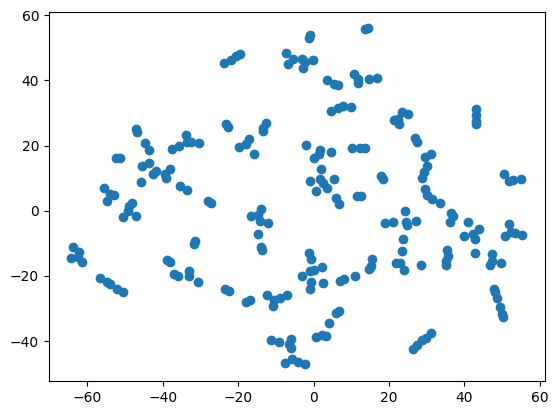

In [19]:
import matplotlib.pyplot as plt

plt.scatter(corpus_embeddings_2d[:,0], corpus_embeddings_2d[:,1])

C:\Users\mokrota\AppData\Local\Temp\ipykernel_6412\193958425.py:17: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


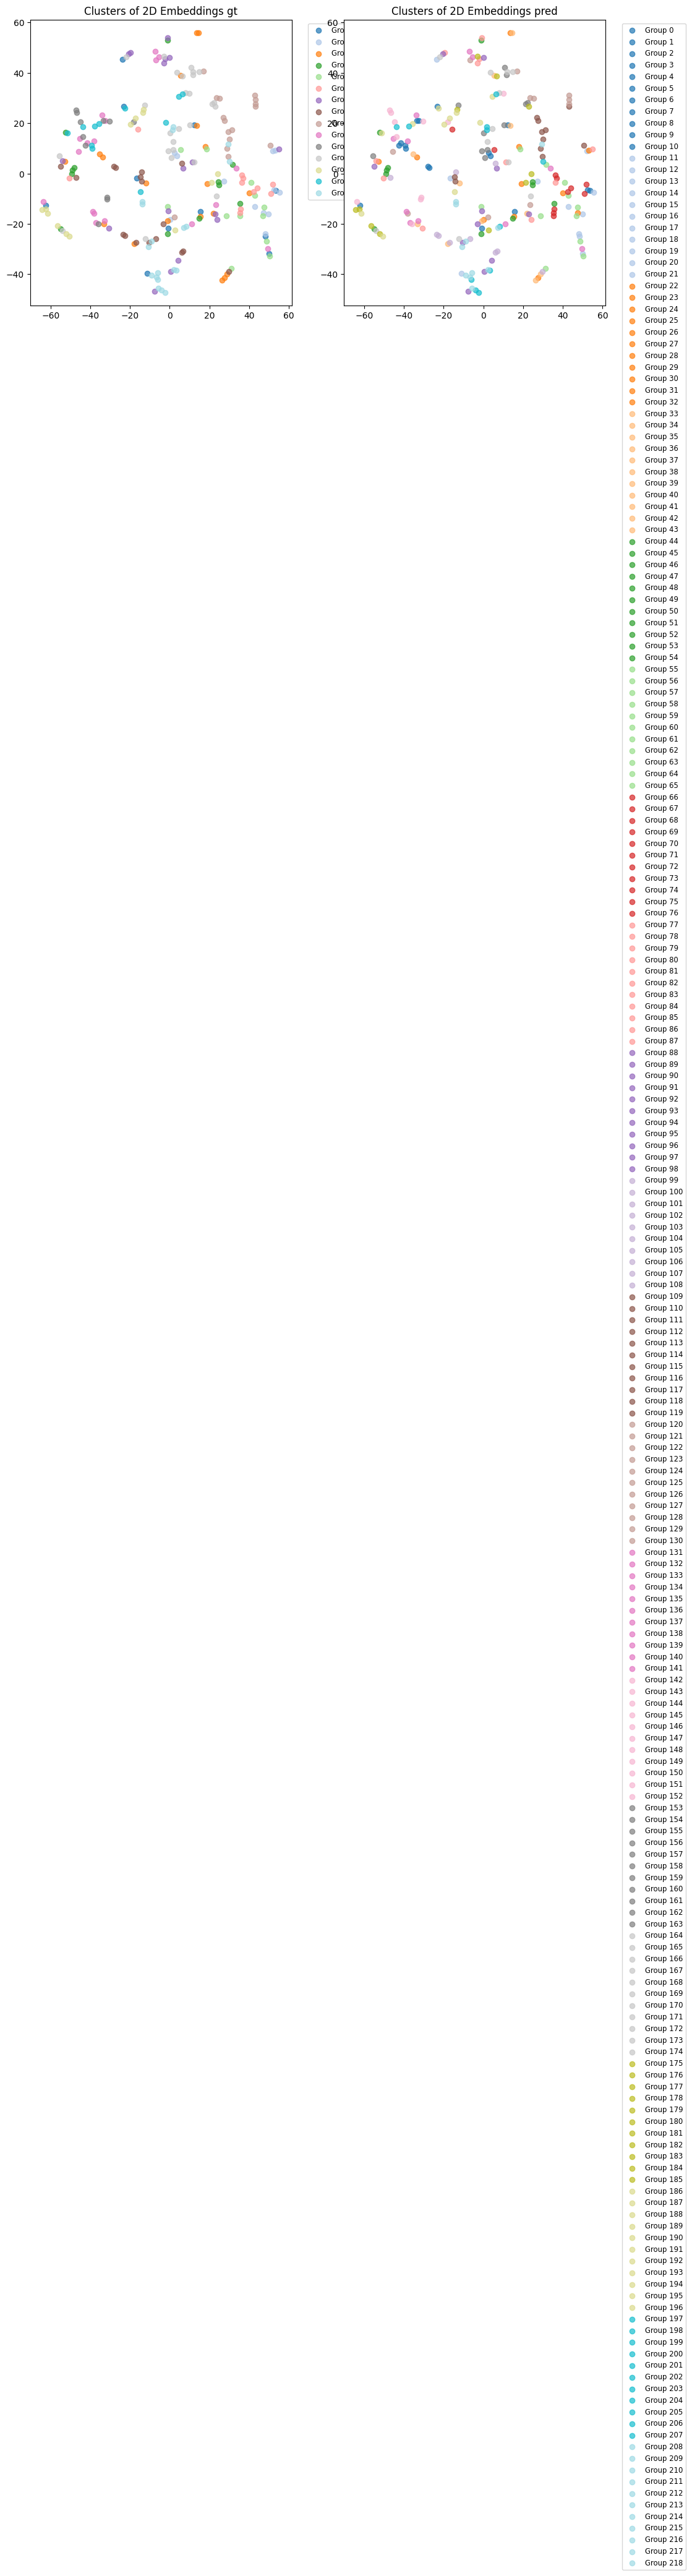

In [20]:
import matplotlib.cm as cm
import numpy as np

colors_pred = cm.tab20(np.linspace(0, 1, len(clusters_ids_pred)))
colors_gt = cm.tab20(np.linspace(0, 1, len(clusters_ids_gt)))

fig, ax = plt.subplots(1, 2, figsize=(12, 6))

for cluster_ids, colormap, name, id in [(clusters_ids_gt, colors_gt, "gt", 0), (clusters_ids_pred, colors_pred, "pred", 1)]:
    for i, cluster in enumerate(cluster_ids):
        points = corpus_embeddings_2d[cluster]
        ax[id].scatter(points[:, 0], points[:, 1], color=colormap[i], label=f"Group {i}", alpha=0.7)

    ax[id].set_title(f"Clusters of 2D Embeddings {name}")
    ax[id].legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize='small')

plt.tight_layout()
plt.show()


In [21]:
import plotly.graph_objects as go
import numpy as np
import matplotlib.cm as cm

# Generate colormaps for predicted and ground truth clusters
colors_pred = cm.tab20(np.linspace(0, 1, len(clusters_ids_pred)))
colors_gt = cm.tab20(np.linspace(0, 1, len(clusters_ids_gt)))

# Convert matplotlib colormap (RGBA) to Plotly-friendly hex
def rgba_to_hex(rgba):
    r, g, b, _ = (int(255 * x) for x in rgba)
    return f'#{r:02x}{g:02x}{b:02x}'

colors_pred = [rgba_to_hex(c) for c in colors_pred]
colors_gt = [rgba_to_hex(c) for c in colors_gt]

# Create subplots with two columns
from plotly.subplots import make_subplots
fig = make_subplots(rows=1, cols=2, subplot_titles=("Clusters of 2D Embeddings gt", "Clusters of 2D Embeddings pred"))

# Add traces for ground truth
for i, cluster in enumerate(clusters_ids_gt):
    points = corpus_embeddings_2d[cluster]
    fig.add_trace(
        go.Scatter(
            x=points[:, 0],
            y=points[:, 1],
            mode='markers',
            marker=dict(color=colors_gt[i], size=6),
            name=f"GT Group {i}",
            legendgroup="gt",
            showlegend=False  # Toggle to True if you want legends per group
        ),
        row=1, col=1
    )

# Add traces for predicted clusters
for i, cluster in enumerate(clusters_ids_pred):
    points = corpus_embeddings_2d[cluster]
    fig.add_trace(
        go.Scatter(
            x=points[:, 0],
            y=points[:, 1],
            mode='markers',
            marker=dict(color=colors_pred[i], size=6),
            name=f"Pred Group {i}",
            legendgroup="pred",
            showlegend=False
        ),
        row=1, col=2
    )

fig.update_layout(
    height=600,
    width=1000,
    title_text="Cluster Comparison: Ground Truth vs Prediction",
    showlegend=True
)

fig.show()


In [25]:
labels_pred = []
labels_gt = []

for ind, cluster in enumerate(clusters_ids_gt):
    for s_id in cluster:
        labels_gt.append([ind, s_id])
labels_gt = sorted(labels_gt, key=lambda x: x[1])
labels_gt = list(map(lambda x: x[0], labels_gt))

for ind, cluster in enumerate(clusters_ids_pred):
    for s_id in cluster:
        labels_pred.append([ind, s_id])
labels_pred = sorted(labels_pred, key=lambda x: x[1])
labels_pred = list(map(lambda x: x[0], labels_pred))

In [23]:
from sklearn import metrics

rand_ind_score = metrics.rand_score(labels_pred, labels_gt)
ad_rand_ind_score = metrics.adjusted_rand_score(labels_pred, labels_gt)

In [24]:
rand_ind_score, ad_rand_ind_score

(0.9321031746031746, 0.0017800584191058739)